# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [3]:
news_data = pd.read_excel('news_data.xlsx', skiprows = [0,1,2,4], header = [0,1],index_col = 0, parse_dates= True)

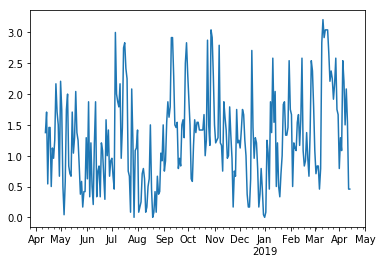

In [11]:
# 相比于过去45天的新闻意外发布活动量(过去24小时平均)
news_data['BA','NEWS_HEAT_PUB_DAVG'].plot()
plt.show()

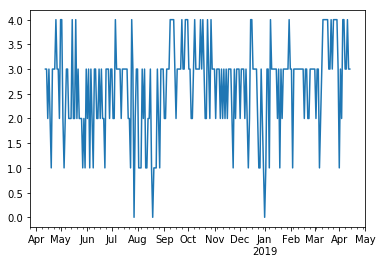

In [14]:
# 相比于过去45天的新闻意外发布活动量（过去24小时最大）
news_data['BA','NEWS_HEAT_PUB_DMAX'].plot()
plt.show()

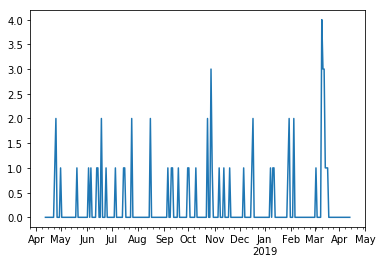

In [15]:
# 相比于过去45天的新闻读者人数（过去24小时平均）
news_data['BA','NEWS_HEAT_READ_DAVG'].plot()
plt.show()

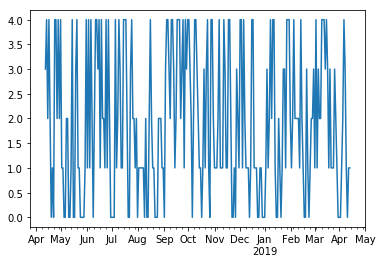

In [16]:
# 相比于过去45天的新闻读者人数（过去24小时最大）
news_data['BA','NEWS_HEAT_READ_DMAX'].plot()
plt.show()

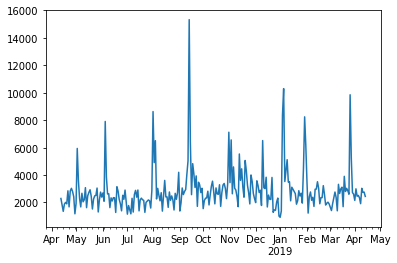

In [19]:
# 过去24小时发布的新闻总数
news_data['AAPL','NEWS_PUBLICATION_COUNT'].plot()
plt.show()

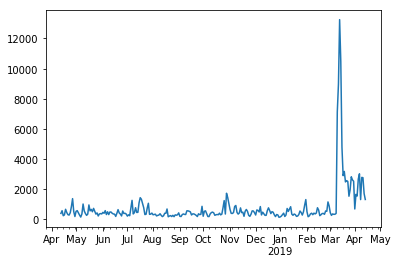

In [20]:
# 过去24小时发布的新闻总数
news_data['BA','NEWS_PUBLICATION_COUNT'].plot()
plt.show()

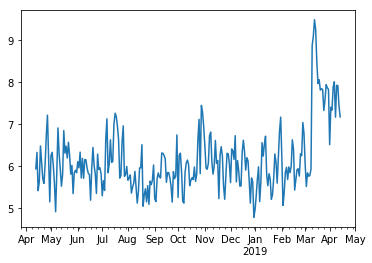

In [64]:
np.log(news_data['BA','NEWS_PUBLICATION_COUNT']).plot()


In [4]:
all_prices = pd.read_excel('price.xlsx', index_col=0, header = 0, parse_dates=True)

In [5]:
all_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2018-04-12,66.5953,46.0872,110.400,171.5281,87.9640,86.6259,296.94,57.8211,147.5089,226.96,...,42.6463,68.3180,74.0829,48.7770,27.1175,76.1852,84.2859,105.5426,52.9578,83.4350
2018-04-13,66.6052,45.3945,106.446,172.1093,87.6871,85.2802,296.74,57.4869,147.5482,224.06,...,43.0919,67.2961,74.6777,48.5886,27.0598,75.8987,83.9616,104.6996,51.7056,83.0474
2018-04-16,67.5566,45.9190,106.287,173.1829,88.4224,87.1956,296.32,58.2535,148.8160,226.52,...,43.8669,66.9915,75.3493,49.7686,27.9148,76.8471,84.7872,106.3558,52.1556,83.8722
2018-04-17,67.8241,45.2757,108.034,175.5666,89.3677,89.4253,304.43,58.7744,151.5875,231.16,...,44.1866,68.6717,75.1478,49.8480,28.7985,77.9238,85.1214,107.9228,50.7957,85.1343
2018-04-18,68.9242,47.2649,107.225,175.1726,90.0648,91.1050,307.63,58.4992,152.8455,231.10,...,43.9057,66.8245,76.0017,50.1950,29.0771,78.2597,85.5048,109.1724,50.9522,85.4324


In [17]:
def generate_classes(look_back_period, look_ahead_period):
    price_before = all_prices.shift(periods = look_back_period)
    price_after = all_prices.shift(periods = -look_ahead_period)
    delta_price_before = (all_prices - price_before)/price_before
    delta_price_after = (price_after - all_prices)/all_prices

#     delta_price_before[delta_price_before>0.01] = 1
#     delta_price_before[delta_price_before<-0.01] = -1
#     delta_price_before[(delta_price_before<=0.01) & (delta_price_before >= -0.01)] = 0
#     delta_price_after[delta_price_after>0.01] = 1
#     delta_price_after[delta_price_after<-0.01] = -1
#     delta_price_after[(delta_price_after<=0.01) & (delta_price_after >= -0.05)] = 0

    over_or_under_react = delta_price_before*delta_price_after
    
    return over_or_under_react

In [97]:
over_or_under_react = generate_classes(1,1)
news_count = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")]
# news_count = news_count.shift(1)
# news_count.iloc[0] = news_count.iloc[1]
news_count.columns = news_data.columns.get_level_values(0)[0:505]
news_count_zscore = news_count.apply(zscore)

over_or_under_react_value = over_or_under_react.melt().value
news_count_value = news_count.melt().value
news_count_zscore_value = news_count_zscore.melt().value

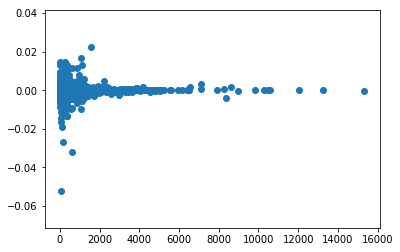

In [98]:
plt.scatter(news_count_value,over_or_under_react_value)

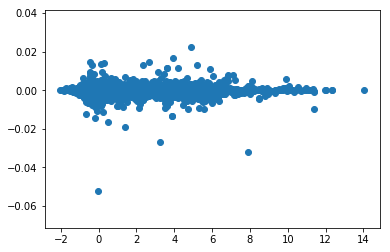

In [99]:
plt.scatter(news_count_zscore_value,over_or_under_react_value)

# Regression

In [356]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [50]:
regression_data = pd.DataFrame()

regression_data['target_1'] = generate_classes(1,1).melt().value
regression_data['target_2'] = generate_classes(1,5).melt().value
regression_data['target_3'] = generate_classes(1,10).melt().value
regression_data['target_4'] = generate_classes(1,15).melt().value

regression_data['NEWS_PUBLICATION_COUNT'] = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")].apply(zscore).melt().value
regression_data['NEWS_HEAT_READ_DAVG'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DAVG")].apply(zscore).melt().value
regression_data['NEWS_HEAT_READ_DMAX'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DMAX")].apply(zscore).melt().value
regression_data['NEWS_NEG_SENTIMENT_COUNT'] = news_data.loc[:,(slice(None),"NEWS_NEG_SENTIMENT_COUNT")].apply(zscore).melt().value
regression_data['NEWS_POS_SENTIMENT_COUNT'] = news_data.loc[:,(slice(None),"NEWS_POS_SENTIMENT_COUNT")].apply(zscore).melt().value
regression_data['NEWS_SENTIMENT_DAILY_AVG'] = news_data.loc[:,(slice(None),"NEWS_SENTIMENT_DAILY_AVG")].apply(zscore).melt().value

regression_data = regression_data.dropna()

In [26]:
X = np.array(regression_data.iloc[:,4:])
y = np.array(regression_data.iloc[:,2])
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)

0.0009076718287138741
[-1.40225063e-05 -2.46920538e-05 -7.06639820e-06 -9.94962507e-06
  1.91890644e-06 -5.86704253e-07]


In [80]:
NEWS_PUBLICATION_COUNT = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")]
NEWS_PUBLICATION_COUNT.columns = news_data.columns.get_level_values(0)[0:505]
LOG_NEWS_PUBLICATION_COUNT = np.log(NEWS_PUBLICATION_COUNT)

NEWS_NEG_SENTIMENT_COUNT = news_data.loc[:,(slice(None),"NEWS_NEG_SENTIMENT_COUNT")]
NEWS_NEG_SENTIMENT_COUNT.columns = news_data.columns.get_level_values(0)[0:505]
LOG_NEWS_NEG_SENTIMENT_COUNT = np.log(NEWS_NEG_SENTIMENT_COUNT)

NEWS_POS_SENTIMENT_COUNT = news_data.loc[:,(slice(None),"NEWS_POS_SENTIMENT_COUNT")]
NEWS_POS_SENTIMENT_COUNT.columns = news_data.columns.get_level_values(0)[0:505]
LOG_NEWS_POS_SENTIMENT_COUNT = np.log(NEWS_POS_SENTIMENT_COUNT)

In [340]:
log_return = np.log(all_prices/all_prices.shift(1))
_return = (all_prices-all_prices.shift(1))/all_prices.shift(1)
return_return = (_return-_return.shift(1))/_return.shift(1)
log_return_lag_1 = log_return.shift(1)
log_return_lag_2 = log_return.shift(2)
log_return_lag_3 = log_return.shift(3)

In [877]:
def regre():
    list_ = []
    for i in range(-1,0):

        regression_data_2 = pd.DataFrame()
        regression_data_2['log_return'] = np.array(log_return.melt().value)
        
#         regression_data_2['_return'] = np.array(_return.melt().value)
#         regression_data_2['return_return'] = np.array(_return.melt().value)
    
#         regression_data_2['log_log_return'] = np.array(log_log_return.shift(i).melt().value)
        
        regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
        regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
        regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
        # regression_data_2['NEWS_PUBLICATION_COUNT'] = np.array(NEWS_PUBLICATION_COUNT.melt().value)
        # regression_data_2['LOG_NEWS_NEG_SENTIMENT_COUNT'] = np.array(LOG_NEWS_NEG_SENTIMENT_COUNT.melt().value)
        # regression_data_2['LOG_NEWS_POS_SENTIMENT_COUNT'] = np.array(LOG_NEWS_POS_SENTIMENT_COUNT.melt().value)

        # regression_data_2['NEWS_PUBLICATION_COUNT'] = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")].apply(zscore).melt().value
        # regression_data_2['NEWS_HEAT_READ_DAVG'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DAVG")].apply(zscore).melt().value
        # regression_data_2['NEWS_HEAT_READ_DMAX'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DMAX")].apply(zscore).melt().value
#         regression_data_2['NEWS_NEG_SENTIMENT_COUNT'] = NEWS_NEG_SENTIMENT_COUNT.apply(zscore).shift(i).melt().value
#         regression_data_2['NEWS_POS_SENTIMENT_COUNT'] = NEWS_POS_SENTIMENT_COUNT.apply(zscore).shift(i).melt().value
        
        # regression_data_2['NEWS_SENTIMENT_DAILY_AVG'] = news_data.loc[:,(slice(None),"NEWS_SENTIMENT_DAILY_AVG")].apply(zscore).melt().value
#         regression_data_2['dispersion'] = dispersion.apply(zscore).melt().value
#         regression_data_2['dispersion'] = dispersion.melt().shift(i).value
#         regression_data_2['delta_dispersion'] = delta_dispersion.melt().shift(i).value
        regression_data_2 = regression_data_2.dropna()
        
#         X = np.array(regression_data_2.iloc[:,1:])
        X = regression_data_2.iloc[:,1:]
#         y = np.array(regression_data_2.iloc[:,0])
        y = regression_data_2.iloc[:,0]
#         reg = LinearRegression().fit(X, y)
#         list_.append(reg.score(X, y))
        
#     pd.DataFrame(np.array(list_)).plot()

        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

#         print(i,reg.score(X, y),reg.coef_)
#     plt.plot(np.array(list_))

In [370]:
regre()

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     487.8
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          4.69e-315
Time:                        22:32:55   Log-Likelihood:             3.0370e+05
No. Observations:              116363   AIC:                        -6.074e+05
Df Residuals:                  116359   BIC:                        -6.074e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

结论：存在dispersion和neg因素时，加入pos因素并不能使模型解释力获得提升

### volatility of news

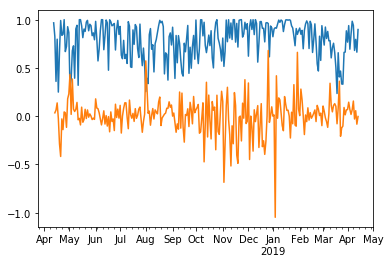

In [345]:
m = NEWS_POS_SENTIMENT_COUNT
n = NEWS_NEG_SENTIMENT_COUNT
mean = (m-n)/(m+n)
dispersion = (m*np.power(1-mean,2)+n*np.power(-1-mean,2))/(m+n)
delta_dispersion = dispersion-dispersion.shift(1)
dispersion.AAPL.plot()
(log_return*10).AAPL.plot()
plt.show()

### over_reaction_factor

In [876]:
def regre_test(lag):
    list_ = []
    for i in range(-1,0):
        regression_data_2 = pd.DataFrame()
        regression_data_2['log_return'] = np.array(log_return.melt().value)
        
#         regression_data_2['_return'] = np.array(_return.melt().value)
#         regression_data_2['return_return'] = np.array(_return.melt().value)   
#         regression_data_2['log_log_return'] = np.array(log_log_return.shift(i).melt().value)
        
        regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
        
        
        
        regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
        regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
#         regression_data_2['NEWS_PUBLICATION_COUNT'] = NEWS_PUBLICATION_COUNT.shift(i).melt().value
        # regression_data_2['LOG_NEWS_NEG_SENTIMENT_COUNT'] = np.array(LOG_NEWS_NEG_SENTIMENT_COUNT.melt().value)
        # regression_data_2['LOG_NEWS_POS_SENTIMENT_COUNT'] = np.array(LOG_NEWS_POS_SENTIMENT_COUNT.melt().value)

        # regression_data_2['NEWS_PUBLICATION_COUNT'] = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")].apply(zscore).melt().value
        # regression_data_2['NEWS_HEAT_READ_DAVG'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DAVG")].apply(zscore).melt().value
        # regression_data_2['NEWS_HEAT_READ_DMAX'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DMAX")].apply(zscore).melt().value
        
        
        regression_data_2['NEWS_NEG_SENTIMENT_COUNT'] = NEWS_NEG_SENTIMENT_COUNT.apply(zscore).shift(i).melt().value

        
        
        #         regression_data_2['NEWS_POS_SENTIMENT_COUNT'] = NEWS_POS_SENTIMENT_COUNT.apply(zscore).shift(i).melt().value
        
        # regression_data_2['NEWS_SENTIMENT_DAILY_AVG'] = news_data.loc[:,(slice(None),"NEWS_SENTIMENT_DAILY_AVG")].apply(zscore).melt().value
#         regression_data_2['dispersion'] = dispersion.apply(zscore).melt().value


        regression_data_2['dispersion'] = dispersion.shift(i).melt().value
    
    
#         regression_data_2['delta_dispersion'] = delta_dispersion.melt().shift(i).value


#         regression_data_2['over_reaction_factor'] = over_reaction_factor(lag).melt().value
    
    
#         regression_data_2['NEG_0_1_signal'] = NEG_0_1_signal.shift(lag).melt().value
        regression_data_2 = regression_data_2.dropna()
        
#         X = np.array(regression_data_2.iloc[:,1:])
        X = regression_data_2.iloc[:,1:]
#         y = np.array(regression_data_2.iloc[:,0])
        y = regression_data_2.iloc[:,0]
#         reg = LinearRegression().fit(X, y)
#         list_.append(reg.score(X, y))
        
#     pd.DataFrame(np.array(list_)).plot()

        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.tvalues)
        print(est2.rsquared)
        print(est2.summary())

#         print(i,reg.score(X, y),reg.coef_)
#     plt.plot(np.array(list_))

In [723]:
regre_test(5)

const                       21.124122
log_return_lag_1             3.175041
log_return_lag_2             4.635797
log_return_lag_3             3.431816
NEWS_NEG_SENTIMENT_COUNT   -33.535180
dispersion                 -21.028703
dtype: float64
0.012644963924045793
                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     295.7
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.37e-315
Time:                        00:28:53   Log-Likelihood:             3.0126e+05
No. Observations:              115459   AIC:                        -6.025e+05
Df Residuals:                  115453   BIC:                        -6.024e+05
Df Model:                           5                                         
Covariance Type:         

In [773]:
def over_reaction_factor(lag):
    over_reaction_factor = log_return
    for i in range(1,lag+1):
        over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)

    NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT.fillna(0).apply(zscore)
    NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
    NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
    NEG_0_1_signal = NEG_0_1_signal.shift(lag-1)

    NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 1    

    return NEG_0_1_signal

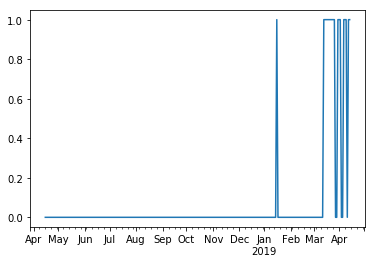

In [757]:
over_reaction_factor(3).BA.plot()

In [778]:
def regre_test_over_reaction(lag):
    list_ = []
    for i in range(-1,0):
        regression_data_2 = pd.DataFrame()
        regression_data_2['log_return'] = np.array(log_return.melt().value)
        
#         regression_data_2['_return'] = np.array(_return.melt().value)
#         regression_data_2['return_return'] = np.array(_return.melt().value)   
#         regression_data_2['log_log_return'] = np.array(log_log_return.shift(i).melt().value)
        
#         regression_data_2['log_return_lag_1'] = np.array(log_return_lag_1.melt().value)
#         regression_data_2['log_return_lag_2'] = np.array(log_return_lag_2.melt().value)
#         regression_data_2['log_return_lag_3'] = np.array(log_return_lag_3.melt().value)
#         regression_data_2['NEWS_PUBLICATION_COUNT'] = NEWS_PUBLICATION_COUNT.shift(i).melt().value
        # regression_data_2['LOG_NEWS_NEG_SENTIMENT_COUNT'] = np.array(LOG_NEWS_NEG_SENTIMENT_COUNT.melt().value)
        # regression_data_2['LOG_NEWS_POS_SENTIMENT_COUNT'] = np.array(LOG_NEWS_POS_SENTIMENT_COUNT.melt().value)

        # regression_data_2['NEWS_PUBLICATION_COUNT'] = news_data.loc[:,(slice(None),"NEWS_PUBLICATION_COUNT")].apply(zscore).melt().value
        # regression_data_2['NEWS_HEAT_READ_DAVG'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DAVG")].apply(zscore).melt().value
        # regression_data_2['NEWS_HEAT_READ_DMAX'] = news_data.loc[:,(slice(None),"NEWS_HEAT_READ_DMAX")].apply(zscore).melt().value
        
        
#         regression_data_2['NEWS_NEG_SENTIMENT_COUNT'] = NEWS_NEG_SENTIMENT_COUNT.apply(zscore).shift(i).melt().value

        
        
        #         regression_data_2['NEWS_POS_SENTIMENT_COUNT'] = NEWS_POS_SENTIMENT_COUNT.apply(zscore).shift(i).melt().value
        
        # regression_data_2['NEWS_SENTIMENT_DAILY_AVG'] = news_data.loc[:,(slice(None),"NEWS_SENTIMENT_DAILY_AVG")].apply(zscore).melt().value
#         regression_data_2['dispersion'] = dispersion.apply(zscore).melt().value


#         regression_data_2['dispersion'] = dispersion.shift(i).melt().value
    
    
#         regression_data_2['delta_dispersion'] = delta_dispersion.melt().shift(i).value


        regression_data_2['over_reaction_factor'] = over_reaction_factor(lag).shift(-1).melt().value
    
    
#         regression_data_2['NEG_0_1_signal'] = NEG_0_1_signal.shift(lag).melt().value
        regression_data_2 = regression_data_2.dropna()
        
#         X = np.array(regression_data_2.iloc[:,1:])
        X = regression_data_2.iloc[:,1:]
#         y = np.array(regression_data_2.iloc[:,0])
        y = regression_data_2.iloc[:,0]
#         reg = LinearRegression().fit(X, y)
#         list_.append(reg.score(X, y))
        
#     pd.DataFrame(np.array(list_)).plot()

        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
#         print(est2.tvalues)
        print(est2.rsquared)
        print(est2.summary())

#         print(i,reg.score(X, y),reg.coef_)
#     plt.plot(np.array(list_))

In [769]:
for i in range(1,4):
    regre_test_over_reaction(i)

0.002682990076697922
                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     328.3
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.76e-73
Time:                        00:48:25   Log-Likelihood:             3.1842e+05
No. Observations:              122052   AIC:                        -6.368e+05
Df Residuals:                  122050   BIC:                        -6.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const      

### 结论：在2天之内，有明显的负向惯性

In [852]:
def over_reaction_factor_look_ahead(lag, period, th):
    over_reaction_factor = log_return
    for i in range(1,lag+1):
        over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)

    NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT.fillna(0).apply(zscore)
    NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
    NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
    NEG_0_1_signal = NEG_0_1_signal.shift(lag-1)

    NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 0.1    
    
#     look_ahead_factor = log_return.shift(lag)
    for i in range(1,period+1):
        NEG_0_1_signal = NEG_0_1_signal+log_return.shift(lag+i)
        
#         look_ahead_factor = look_ahead_factor+look_ahead_factor.shift(i)
    
#     NEG_0_1_signal[(NEG_0_1_signal==1) & (look_ahead_factor>th)] = 1
    
    return NEG_0_1_signal

In [853]:
def regre_test_over_reaction_look_ahead(lag,period,th):
    list_ = []
    for i in range(-1,0):
        regression_data_2 = pd.DataFrame()
        regression_data_2['log_return'] = np.array(log_return.melt().value)
        regression_data_2['over_reaction_factor'] = over_reaction_factor_look_ahead(lag,period,th).shift(-1).melt().value
        regression_data_2 = regression_data_2.dropna()
        
        X = regression_data_2.iloc[:,1:]
        y = regression_data_2.iloc[:,0]


        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        if (np.abs(est2.tvalues[1])>3):
            print("-------------")
            print(lag,period,th)
            print("t = ", est2.tvalues[1].round(2))
            print("rsquared = ", est2.rsquared.round(3))

In [847]:
for i in range(0,10):
    for j in [5]:
        for m in [0,0.01,0.1]:
            regre_test_over_reaction_look_ahead(i,j,m)

-------------
0 5 0
t =  17.72
rsquared =  0.003
-------------
0 5 0.01
t =  17.72
rsquared =  0.003
-------------
0 5 0.1
t =  17.72
rsquared =  0.003
-------------
1 5 0
t =  43.19
rsquared =  0.015
-------------
1 5 0.01
t =  43.19
rsquared =  0.015
-------------
1 5 0.1
t =  43.19
rsquared =  0.015
-------------
2 5 0
t =  31.49
rsquared =  0.008
-------------
2 5 0.01
t =  31.49
rsquared =  0.008
-------------
2 5 0.1
t =  31.49
rsquared =  0.008
-------------
3 5 0
t =  19.65
rsquared =  0.003
-------------
3 5 0.01
t =  19.65
rsquared =  0.003
-------------
3 5 0.1
t =  19.65
rsquared =  0.003
-------------
4 5 0
t =  10.27
rsquared =  0.001
-------------
4 5 0.01
t =  10.27
rsquared =  0.001
-------------
4 5 0.1
t =  10.27
rsquared =  0.001
-------------
5 5 0
t =  6.07
rsquared =  0.0
-------------
5 5 0.01
t =  6.07
rsquared =  0.0
-------------
5 5 0.1
t =  6.07
rsquared =  0.0
-------------
6 5 0
t =  5.08
rsquared =  0.0
-------------
6 5 0.01
t =  5.08
rsquared =  0.0
--

### 由上述分析可知: 条件变量1{...}  与 过去60天累积收益的线性组合具有较好预测能力

In [854]:
def over_reaction_factor_look_ahead_comparison(lag, period, th):
    over_reaction_factor = log_return
#     for i in range(1,lag+1):
#         over_reaction_factor = over_reaction_factor+over_reaction_factor.shift(i)

#     NEG_0_1_signal = NEWS_NEG_SENTIMENT_COUNT.fillna(0).apply(zscore)
#     NEG_0_1_signal[NEG_0_1_signal<0.5] = 0
#     NEG_0_1_signal[NEG_0_1_signal>0.5] = 1
#     NEG_0_1_signal = NEG_0_1_signal.shift(lag-1)

#     NEG_0_1_signal[(NEG_0_1_signal==1) & (over_reaction_factor < 0)] = 0.1    
    
#     look_ahead_factor = log_return.shift(lag)
    for i in range(1,period+1):
        over_reaction_factor = over_reaction_factor+log_return.shift(lag+i)

    return over_reaction_factor

In [870]:
def regre_test_over_reaction_look_ahead_comparison(lag,period,th):
    list_ = []
    for i in range(-1,0):
        regression_data_2 = pd.DataFrame()
        regression_data_2['log_return'] = np.array(log_return.melt().value)
        
        regression_data_2['over_reaction_factor_comparison'] = over_reaction_factor_look_ahead_comparison(lag,period,th).shift(-1).melt().value
        
#         regression_data_2['over_reaction_factor'] = over_reaction_factor_look_ahead(lag,period,th).shift(-1).melt().value
        regression_data_2 = regression_data_2.dropna()
        X = regression_data_2.iloc[:,1:]
        y = regression_data_2.iloc[:,0]


        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        if (np.abs(est2.tvalues[1])>3):
            print("-------------")
            print(lag,period,th)
#             print(est2.tvalues)
            print("rsquared = ", est2.rsquared.round(3))

In [871]:
for i in range(0,10):
    for j in [5]:
        for m in [0,0.01,0.1]:
            regre_test_over_reaction_look_ahead_comparison(i,j,m)

-------------
0 5 0
rsquared =  0.17
-------------
0 5 0.01
rsquared =  0.17
-------------
0 5 0.1
rsquared =  0.17
-------------
1 5 0
rsquared =  0.0
-------------
1 5 0.01
rsquared =  0.0
-------------
1 5 0.1
rsquared =  0.0
-------------
4 5 0
rsquared =  0.0
-------------
4 5 0.01
rsquared =  0.0
-------------
4 5 0.1
rsquared =  0.0
-------------
7 5 0
rsquared =  0.0
-------------
7 5 0.01
rsquared =  0.0
-------------
7 5 0.1
rsquared =  0.0


结论：通过与只观测前60天累计收益的因子只在lag=0有效相比，我们的因子在lag=1时候的策略有效；相比于对照策略具有额外解释力

In [873]:
# AR(3) + NEWS_NEG_SENTIMENT_COUNT + dispersion
regre()

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     295.7
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.37e-315
Time:                        09:49:31   Log-Likelihood:             3.0126e+05
No. Observations:              115459   AIC:                        -6.025e+05
Df Residuals:                  115453   BIC:                        -6.024e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [878]:
# AR(3) Benchmark
regre()

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     23.29
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           4.61e-15
Time:                        09:50:58   Log-Likelihood:             3.3801e+05
No. Observations:              128949   AIC:                        -6.760e+05
Df Residuals:                  128945   BIC:                        -6.760e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002    4.9e-05  